In [28]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Load Digits dataset
data = load_digits()
X, y = data.data, data.target

# Add noise
X += np.random.normal(0, 0.2, X.shape)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data with reduced training size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.3, random_state=42)

In [30]:
# Define models and hyperparameter grids
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [5, 10, 50, 100, 200, 500],
            'max_depth': [None, 3, 5, 10, 20, 50],
            'min_samples_split': [2, 5, 10, 20, 50]
        },
        'param_dist': {
            'n_estimators': randint(5, 1000),
            'max_depth': [None, 3, 5, 10, 20, 30, 50],
            'min_samples_split': randint(2, 100)
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'param_grid': {
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'solver': ['lbfgs', 'liblinear']
        },
        'param_dist': {
            'C': np.logspace(-5, 5, 100),
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'param_grid': {
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'kernel': ['linear', 'rbf']
        },
        'param_dist': {
            'C': np.logspace(-5, 5, 100),
            'kernel': ['linear', 'rbf']
        }
    }
}

In [31]:
# Dictionary to store results
results = {}

In [32]:
# Train and evaluate default models
for model_name, config in models.items():
    print(f"\nTraining {model_name} (Default)...")
    default_model = config['model']
    default_model.fit(X_train, y_train)
    y_pred_default = default_model.predict(X_test)

    results[f"{model_name} (Default)"] = {
        'Accuracy': accuracy_score(y_test, y_pred_default),
        'Precision': precision_score(y_test, y_pred_default, average='weighted'),
        'Recall': recall_score(y_test, y_pred_default, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_default, average='weighted')
    }


Training Random Forest (Default)...

Training Logistic Regression (Default)...

Training SVM (Default)...


In [33]:
# GridSearchCV tuning
for model_name, config in models.items():
    print(f"\nTuning {model_name} with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_grid_model = grid_search.best_estimator_
    y_pred_grid = best_grid_model.predict(X_test)

    results[f"{model_name} (GridSearchCV)"] = {
        'Accuracy': accuracy_score(y_test, y_pred_grid),
        'Precision': precision_score(y_test, y_pred_grid, average='weighted'),
        'Recall': recall_score(y_test, y_pred_grid, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_grid, average='weighted'),
        'Best Parameters': grid_search.best_params_
    }


Tuning Random Forest with GridSearchCV...

Tuning Logistic Regression with GridSearchCV...

Tuning SVM with GridSearchCV...


In [34]:
# RandomizedSearchCV tuning
for model_name, config in models.items():
    print(f"\nTuning {model_name} with RandomizedSearchCV...")
    random_search = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['param_dist'],
        n_iter=30,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_random_model = random_search.best_estimator_
    y_pred_random = best_random_model.predict(X_test)

    results[f"{model_name} (RandomizedSearchCV)"] = {
        'Accuracy': accuracy_score(y_test, y_pred_random),
        'Precision': precision_score(y_test, y_pred_random, average='weighted'),
        'Recall': recall_score(y_test, y_pred_random, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_random, average='weighted'),
        'Best Parameters': random_search.best_params_
    }


Tuning Random Forest with RandomizedSearchCV...

Tuning Logistic Regression with RandomizedSearchCV...

Tuning SVM with RandomizedSearchCV...



Model Performance Comparison:

Random Forest (Default):
Accuracy: 0.9583333333333334
Precision: 0.9599356637339093
Recall: 0.9583333333333334
F1-Score: 0.9585387030782164

Logistic Regression (Default):
Accuracy: 0.9555555555555556
Precision: 0.9557104426510149
Recall: 0.9555555555555556
F1-Score: 0.9555522381060527

SVM (Default):
Accuracy: 0.975
Precision: 0.9756918814780063
Recall: 0.975
F1-Score: 0.9749921163594136

Random Forest (GridSearchCV):
Accuracy: 0.9583333333333334
Precision: 0.9598375281833929
Recall: 0.9583333333333334
F1-Score: 0.9584590015197816
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

Logistic Regression (GridSearchCV):
Accuracy: 0.9555555555555556
Precision: 0.9557104426510149
Recall: 0.9555555555555556
F1-Score: 0.9555522381060527
Best Parameters: {'C': 1, 'solver': 'lbfgs'}

SVM (GridSearchCV):
Accuracy: 0.9611111111111111
Precision: 0.9621360015929907
Recall: 0.9611111111111111
F1-Score: 0.961055774813102
Best Parameters:

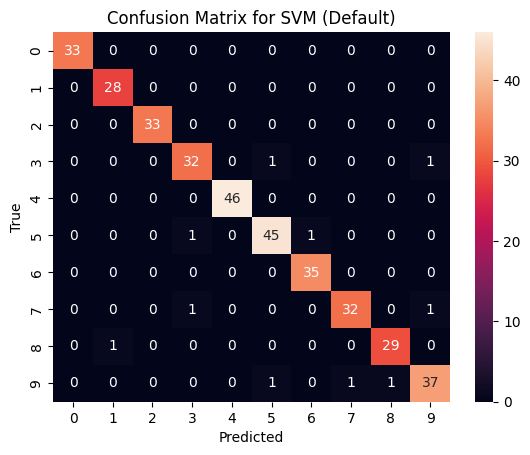

In [35]:
# Print results
print("\nModel Performance Comparison:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Select the best model based on F1-Score
best_model_name = max(results, key=lambda x: results[x]['F1-Score'])
print(f"\nBest Model: {best_model_name}")
print("Performance Metrics:")
for metric, value in results[best_model_name].items():
    print(f"{metric}: {value}")

# Visualize confusion matrix for the best model
cm = confusion_matrix(y_test, best_random_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()